# El problema de los outliers

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mtr

In [5]:
data_auto = pd.read_csv(r'D:\Escritorio\python courses\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\auto\auto-mpg.csv')
data_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


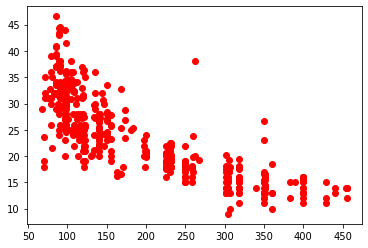

In [7]:
 plt.plot(data_auto['displacement'], data_auto['mpg'], 'ro')

In [24]:
x = data_auto['displacement'].fillna(np.mean(data_auto['displacement']))
x = x[:,np.newaxis]
y = data_auto['mpg'].fillna(np.mean(data_auto['mpg']))
lm = LinearRegression()
lm.fit(x,y)
mtr.mean_squared_error(lm.predict(x),y, squared=False)

4.725967798642038

In [20]:
lm.score(x,y)

0.6261049762826918

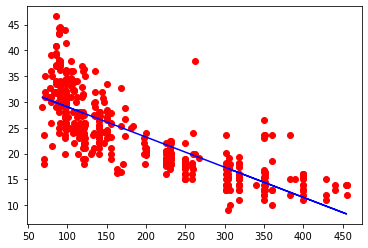

In [22]:
%matplotlib inline
plt.plot(x,y, 'ro')
plt.plot(x, lm.predict(x), color = 'blue')

In [25]:
 data_auto[(data_auto['displacement']>250) & (data_auto['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [39]:
data_auto.loc[395]

mpg                                            38
cylinders                                       6
displacement                                  262
horsepower                                     85
weight                                       3015
acceleration                                   17
model year                                     82
origin                                          1
car name        oldsmobile cutlass ciera (diesel)
Name: 395, dtype: object

In [47]:
data_auto_clean = data_auto.drop([395,258,305,372])
data_auto_clean

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
lm.score

In [48]:
x = data_auto_clean['displacement'].fillna(np.mean(data_auto_clean['displacement']))
x = x[:,np.newaxis]
y = data_auto_clean['mpg'].fillna(np.mean(data_auto_clean['mpg']))
lm = LinearRegression()
lm.fit(x,y)
mtr.mean_squared_error(lm.predict(x),y, squared=False)

4.595033488904569

In [49]:
lm.score(x,y)

0.6466514317531822